TF-IDF (term frequency, inverse document frequency) is a text representation technique in NLP that tackles the word count influence of common English words such as the, is etc (stop words) and some other generic words that are not stop words but can appear in any document. The idea is to give a high score to terms that are really relevant to a given document

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing"
]

In [3]:
# create tf-idf instance
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 27, 'eating': 11, 'pizza': 23, 'loki': 18, 'is': 17, 'ironman': 16, 'ate': 8, 'already': 0, 'apple': 6, 'announcing': 5, 'new': 21, 'iphone': 15, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 13, 'pixel': 22, 'microsoft': 19, 'surface': 25, 'amazon': 3, 'eco': 12, 'dot': 10, 'am': 1, 'biryani': 9, 'and': 4, 'you': 29, 'are': 7, 'grapes': 14, 'something': 24, 'amazing': 2}


In [4]:
dir(v)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 

In [5]:
# print idf score
v.get_feature_names_out()
# prints vocabulary in order of index

array(['already', 'am', 'amazing', 'amazon', 'and', 'announcing', 'apple',
       'are', 'ate', 'biryani', 'dot', 'eating', 'eco', 'google',
       'grapes', 'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model',
       'new', 'pixel', 'pizza', 'something', 'surface', 'tesla', 'thor',
       'tomorrow', 'you'], dtype=object)

In [6]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    indx = v.vocabulary_.get(word) #get index
    print(f"{word} {v.idf_[indx]}") #score of specific index

already 2.504077396776274
am 2.504077396776274
amazing 2.504077396776274
amazon 2.504077396776274
and 2.504077396776274
announcing 1.4054651081081644
apple 2.504077396776274
are 2.504077396776274
ate 2.504077396776274
biryani 2.504077396776274
dot 2.504077396776274
eating 2.09861228866811
eco 2.504077396776274
google 2.504077396776274
grapes 2.504077396776274
iphone 2.504077396776274
ironman 2.504077396776274
is 1.1177830356563834
loki 2.504077396776274
microsoft 2.504077396776274
model 2.504077396776274
new 1.4054651081081644
pixel 2.504077396776274
pizza 2.504077396776274
something 2.504077396776274
surface 2.504077396776274
tesla 2.504077396776274
thor 2.504077396776274
tomorrow 1.4054651081081644
you 2.504077396776274


In [7]:
# first two sentences from corpus
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [8]:
#  corresponding tf-idf vector for the two
transformed_output.toarray()[:2]

array([[0.24247317, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24247317, 0.        ,
        0.        , 0.40642288, 0.        , 0.        , 0.        ,
        0.        , 0.24247317, 0.10823643, 0.24247317, 0.        ,
        0.        , 0.        , 0.        , 0.7274195 , 0.        ,
        0.        , 0.        , 0.24247317, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31652498, 0.5639436 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5639436 , 0.        , 0.25173606, 0.        , 0.        ,
        0.        , 0.31652498, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31652498, 0.        ]])

**e-commerce text classification**

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

***Text***: Description of an item sold on e-commerce website,

***Label***: Category of that item. Total 4 categories: \"Electronics\", \"Household\", \"Books\" and \"Clothing & Accessories\", which almost cover 80% of any E-commerce website

In [9]:
import pandas as pd

df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [10]:
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

no class imbalances

now map label categories to numbers

In [11]:
df['label_num'] = df.label.map({
    'Household': 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


# train test split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.label_num, test_size = 0.2, random_state= 2022, stratify= df.label_num)

In [13]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [14]:
X_train.head()

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23224    Godox CB-09 Hard Carrying Storage Suitcase Car...
4638     Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378     Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...
Name: Text, dtype: object

In [15]:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

use KNN as the classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectionizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [17]:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [18]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [19]:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

use MultinomialNB as the classifier.

In [20]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectionizer_tfidf', TfidfVectorizer()),
    ('Mult NB', MultinomialNB())
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



use random forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('vectionizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.96      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



preprocessed text

In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [25]:
df['preprocessed_test'] = df['Text'].apply(preprocess)

In [26]:
df.head()


,Text,label,label_num,preprocessed_test
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


build model

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_test, df.label_num, test_size = 0.2, random_state= 2022, stratify= df.label_num)

In [29]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('vectionizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.97      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



plot confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1155,   14,   16,   15],
       [  19, 1170,    6,    5],
       [  26,    7, 1163,    4],
       [   9,    6,    1, 1184]], dtype=int64)

Text(69.0, 0.5, 'Truth')

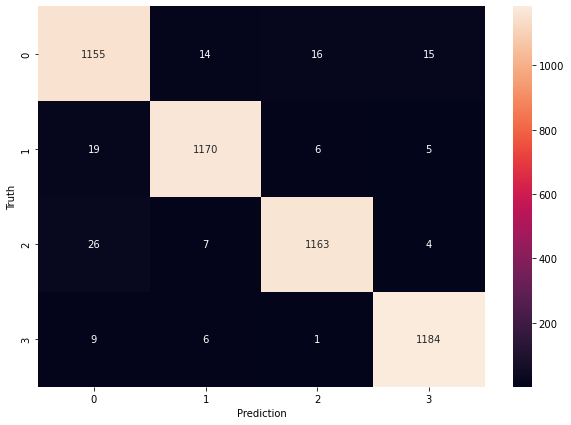

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')